#### erstellt von Tobias Lapp und Sven Brieden am 5.11.2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 4.0)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 16

# Aufgabe

In [2]:
def tanh_exact(x):
    y = np.exp( 2 * x )
    return (y - 1) / (y + 1)
def tanh_taylor(x):
    return x - x**3/3 + 2*x**5/15 - 17*x**7/315

def runtime(func, x_all):
    t0 = time.time()
    for x in x_all:
        tanh_exact(x)
    return time.time() - t0

n = 1000000
x_all = np.linspace(0,1, n)
print("Runtime of %i times: \n The approache with sinh(x)/cosh(x)\
 needs %.4f secunds and the approache with Taylor series %.4f secunds" 
      %(n,    runtime(tanh_exact, x_all),     runtime(tanh_taylor, x_all))     )

Runtime of 1000000 times: 
 The approache with sinh(x)/cosh(x) needs 2.4150 secunds and the approache with Taylor series 2.2594 secunds


# Aufgabe
Analytical we get the result:
$\sum_n^\infty\frac{2n + 1}{n^2 (n + 1)^2}$ = 1

Decreasing should give better values then increasing. The reason is that we start calculating smale numbers with smale numbers later we are getting bigger and bigger with the sum and the new terms.

To reach an accuracy of 10^−5 we need 318 terms.


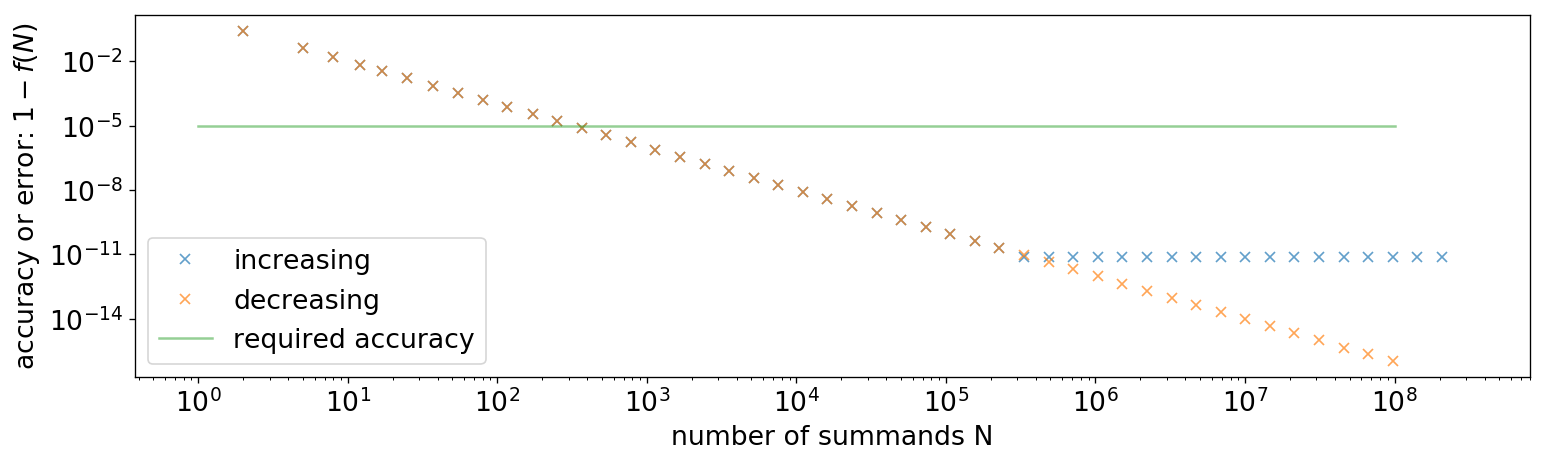

In [3]:
def increasing(N):   
    return sum([ (2 * n + 1) / (n**2 * (n + 1)**2) for n in range(1,N) ])
def decreasing(N):   
    return sum([ (2 * (N-n) + 1) / ((N-n)**2 * ( N -n + 1)**2) for n in range(1,N) ])

used = set()
N_rang = [x for x in [int(x) for x in (np.logspace(.1, 8, 200))] if x not in used and (used.add(x) or True)]
plt.plot(N_rang, [1 - increasing(N) for N in N_rang], "x", label="increasing", alpha = 0.7)
plt.plot(N_rang, [1 - decreasing(N) for N in N_rang], "x", label="decreasing", alpha = 0.7)
plt.plot(np.array(N_rang), 1e-5 + 0*(np.array(N_rang)), label="required accuracy", alpha = 0.5)
plt.xlabel("number of summands N")
plt.ylabel("accuracy or error: $1 - f ( N ) $")
plt.legend()
plt.loglog()

accuracy, N = 1, 0
while accuracy >= 1e-5:
    accuracy = 1 - increasing(N)
    N += 1
print("To reach an accuracy of 10^−5 we need %i terms."%N)

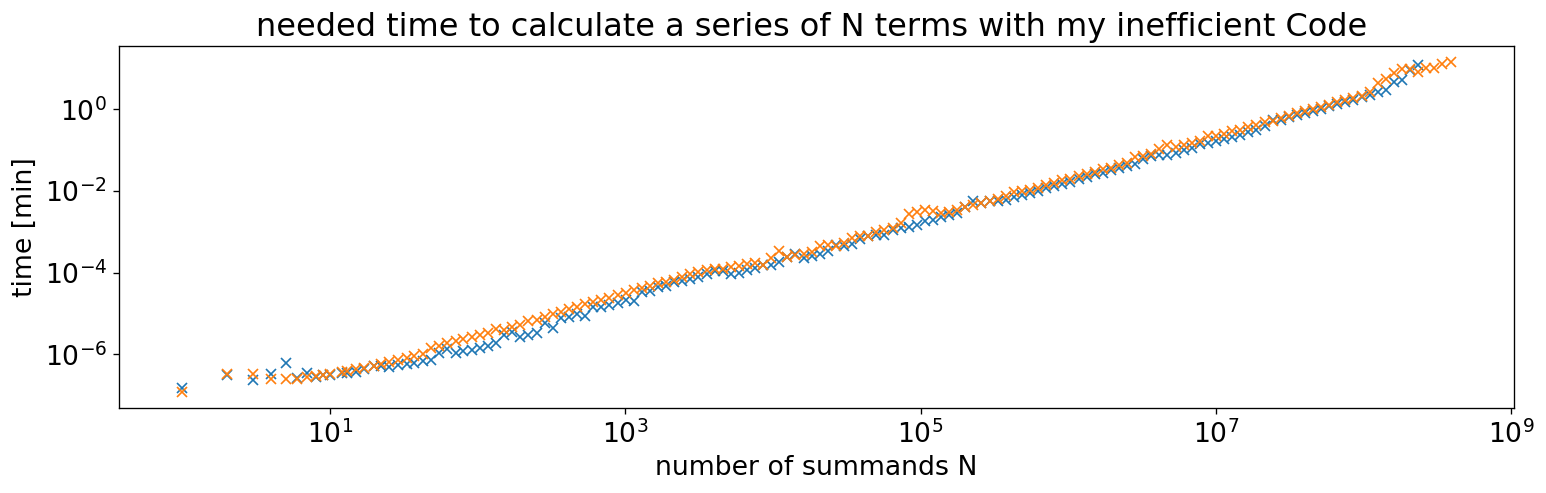

# Aufgabe
### Basic equations :
$$
\begin{matrix}
x_{n+1}&=&4x_n(x - x_n) &(1)&\\
\phi_{n+1}&=&1-2|\phi_n-\frac{1}{2}| &(2)&\\
x_n &=& \text{sin}^2(\frac{\pi}{2}\phi_n )&(3)&\\
\end{matrix}
$$
### further used equations :
$$\begin{matrix}
\text{sin}^2(x) &=& \dfrac{1-\text{cos}(2x)}{2}&(4)&\\
\text{cos}^2(x) &=& \dfrac{1+\text{sin}(2x)}{2}&(5)&\\
\text{sin}^2(x) + \text{cos}^2(x) &=& 1 &(6)&\\
\end{matrix}
$$

(1): fully developed parabola with the initial value $x_0 ∈[0, 1]$ <br />
(2): analytically conjugate of (1)<br />
(3): identification between (1) and (2)<br />
(4) and (5): The power-reduction formulae of trigonometric identities<br />
(6): pythagorean identity

$$
\begin{matrix}
x_{n+x} &=& 4x_n(1-x_n) \\
&=& 4 \text{sin}^2(\frac{\pi}{2}\phi_n )(1-\text{sin}^2(\frac{\pi}{2}\phi_n ))\\
&=& 4 \text{sin}^2(\frac{\pi}{2}\phi_n )\text{cos}^2(\frac{\pi}{2}\phi_n ) \\
&=& 4 \dfrac{1-\text{cos}(\pi\phi_n)}{2} \dfrac{1+\text{cos}(\pi\phi_n)}{2} \\
&=& 1-\text{cos}^2(\pi\phi_n)
\end{matrix}
$$

it follows with $x_{n+1} = \text{sin}^2(\frac{\pi}{2}\phi_{n+1} )$ :<br />
$\phi_{n+1} = \pm2\phi_n$ <br />
the next step we did't understand: with the arcsin of a positive number we get (2)

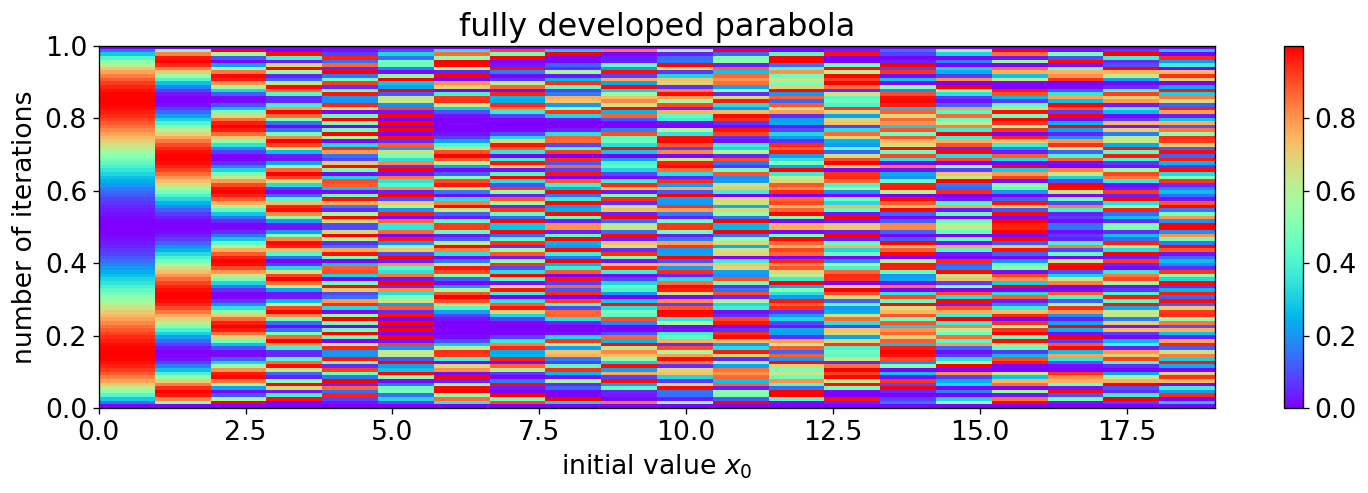

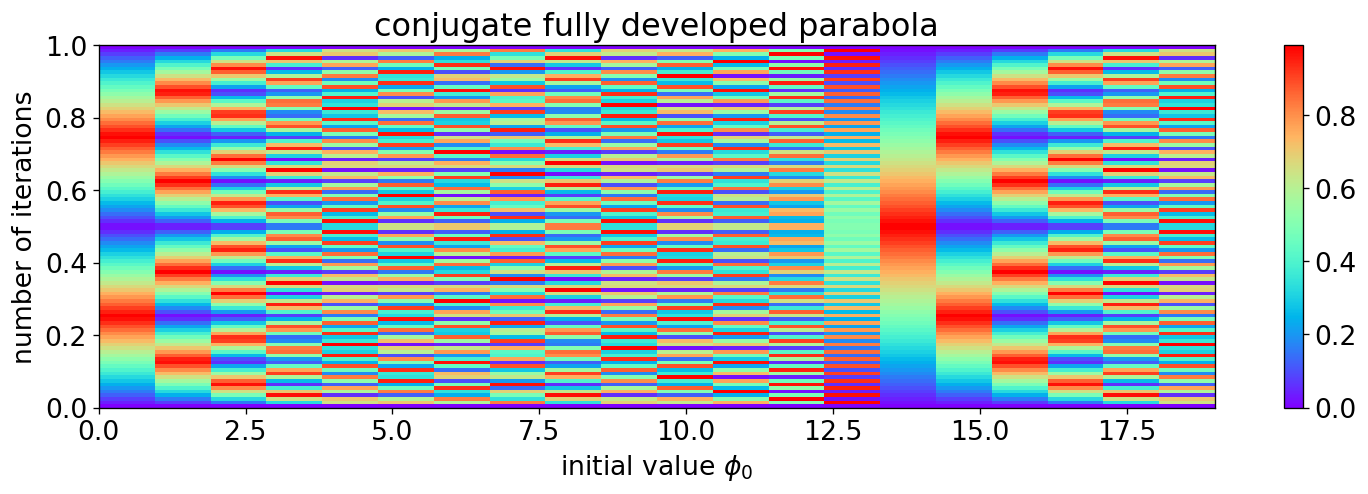

In [5]:
def iteration1(x_0, N):
    n = 0
    x_n = x_0
    while n<=N+1:
        x_n_p_1 = 4 * x_n * (1 - x_n)
        x_n = x_n_p_1
        n += 1
    return x_n_p_1
def iteration2(ϕ_0, N):
    n = 0
    ϕ_n = ϕ_0
    while n<=N+1:
        ϕ_n_p_1 = 1 - 2 * abs(ϕ_n - 1/2)
        ϕ_n = ϕ_n_p_1
        n += 1
    return ϕ_n_p_1

N_range = np.arange(0,20)
x_range = np.linspace(0,1, 100)
ϕ_range = np.linspace(0,1, 100)
chaotic_map1 = np.array([np.array([iteration1(x_0, N) for N in N_range]) for x_0 in x_range ])
chaotic_map2 = np.array([np.array([iteration2(ϕ_0, N) for N in N_range]) for ϕ_0 in ϕ_range ])

plt.imshow(chaotic_map1,cmap='rainbow', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $x_0$")
plt.ylabel("number of iterations")
plt.title("fully developed parabola")
plt.show()
plt.imshow(chaotic_map2,cmap='rainbow', interpolation='nearest', aspect='auto', extent=[min(N_range), max(N_range), min(x_range), max(x_range)])
plt.colorbar()
plt.xlabel("initial value $\phi_0$")
plt.ylabel("number of iterations")
plt.title("conjugate fully developed parabola")
plt.show()